In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,r2_score,accuracy_score,roc_auc_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import PowerTransformer, StandardScaler
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, KFold
df=pd.read_csv('car data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [6]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
df.dropna(inplace=True)
df.shape

(301, 9)

In [8]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(299, 9)

In [10]:
num_col=df.select_dtypes(include='number')
cat_col=df.select_dtypes(include='object')
print(num_col)

     Year  Selling_Price  Present_Price  Kms_Driven  Owner
0    2014           3.35           5.59       27000      0
1    2013           4.75           9.54       43000      0
2    2017           7.25           9.85        6900      0
3    2011           2.85           4.15        5200      0
4    2014           4.60           6.87       42450      0
..    ...            ...            ...         ...    ...
296  2016           9.50          11.60       33988      0
297  2015           4.00           5.90       60000      0
298  2009           3.35          11.00       87934      0
299  2017          11.50          12.50        9000      0
300  2016           5.30           5.90        5464      0

[299 rows x 5 columns]


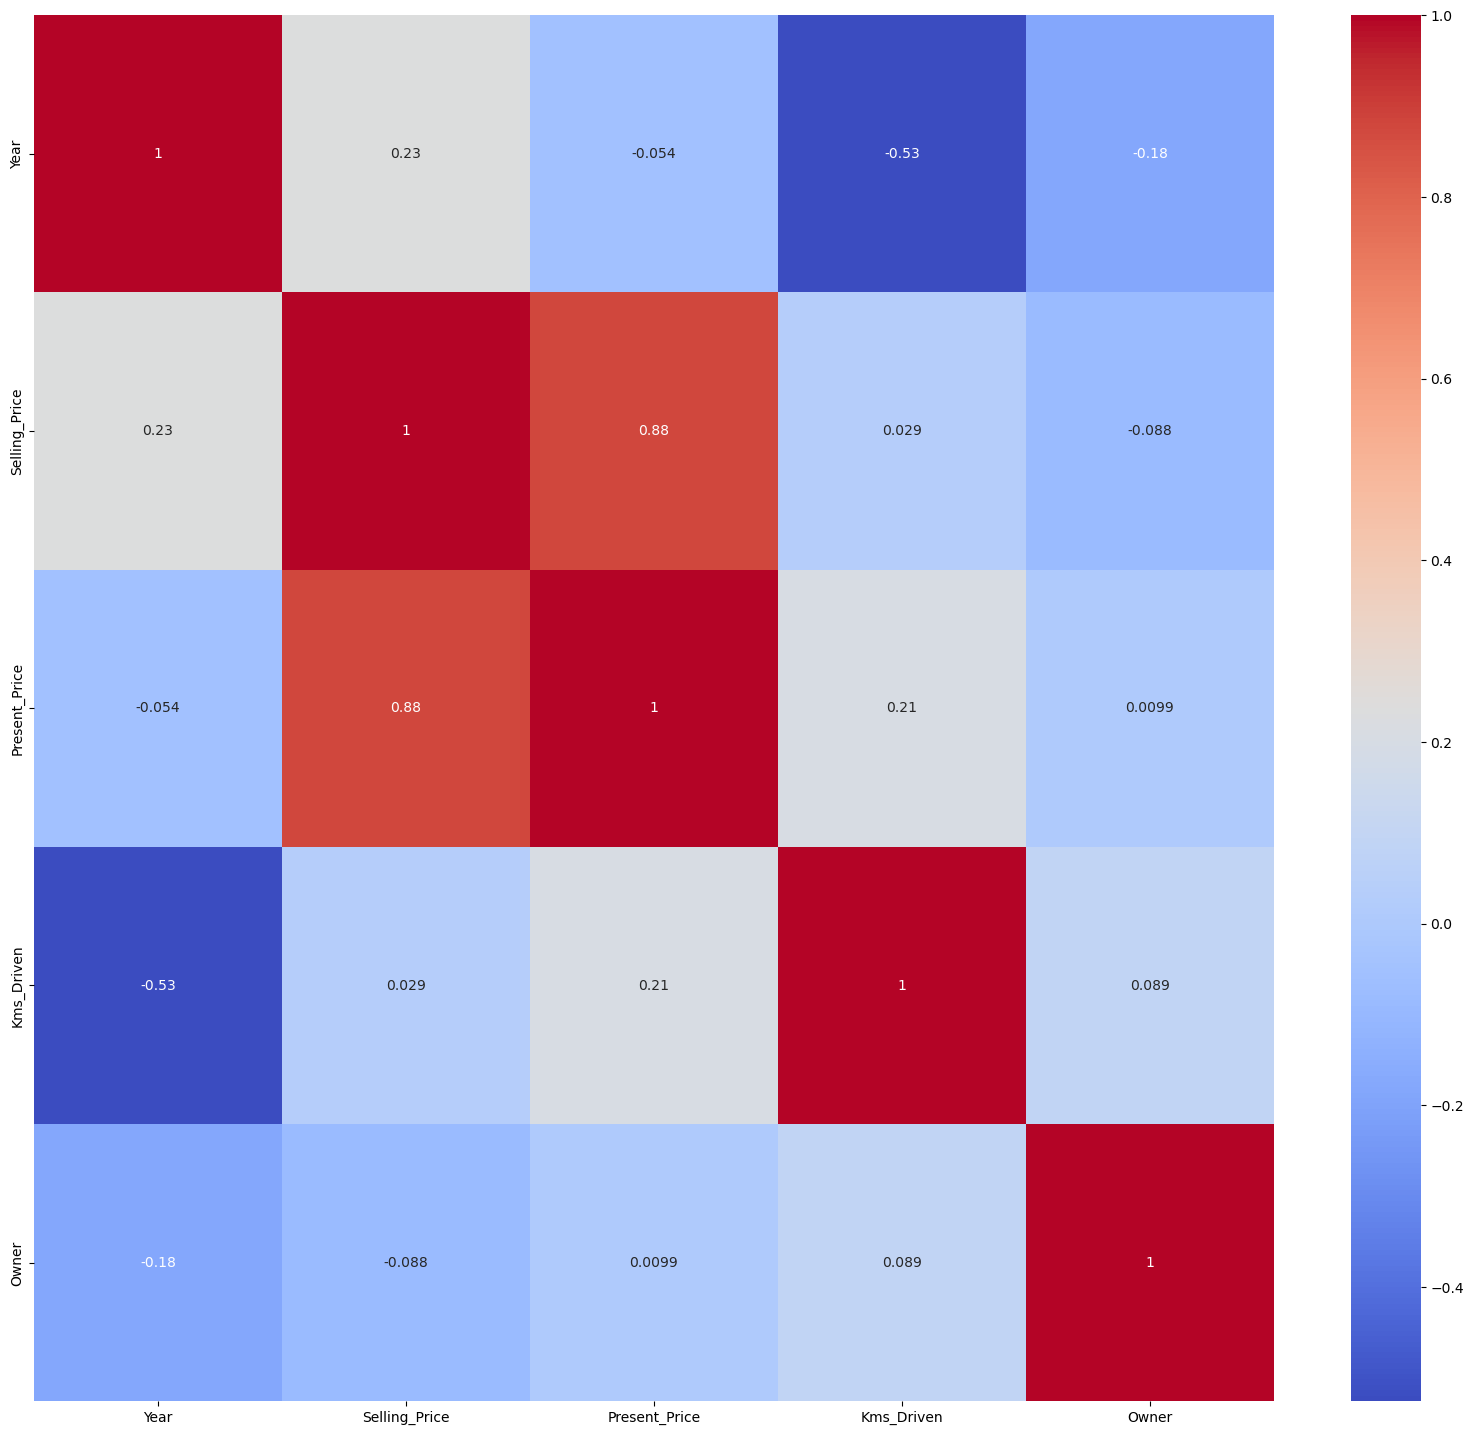

In [11]:
plt.figure(figsize=(20, 18))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.show()


-1.2368759011840527


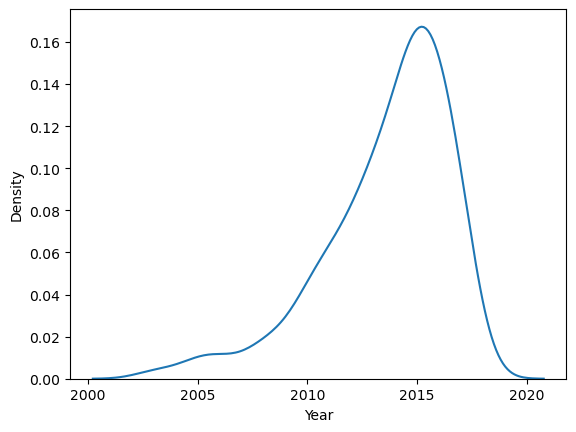

2.536521826497541


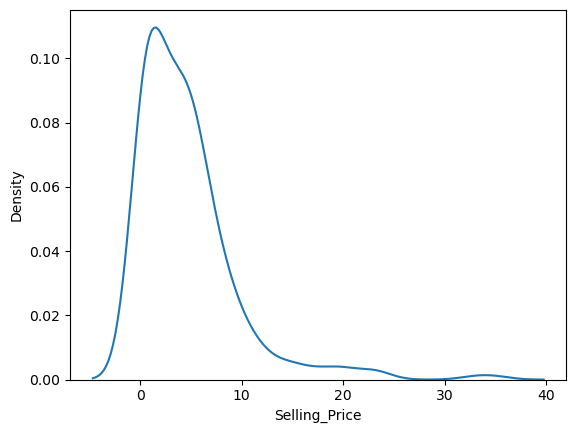

4.186894223914912


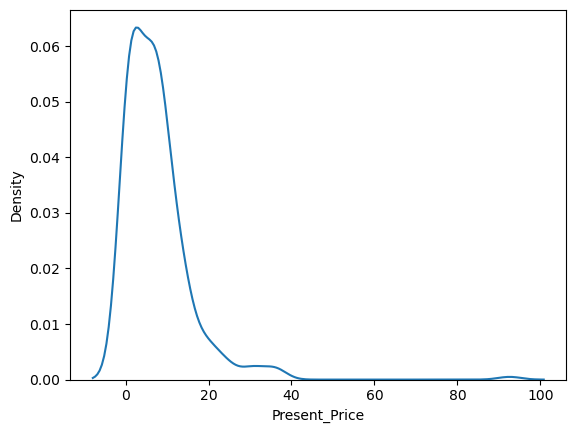

6.418134387971488


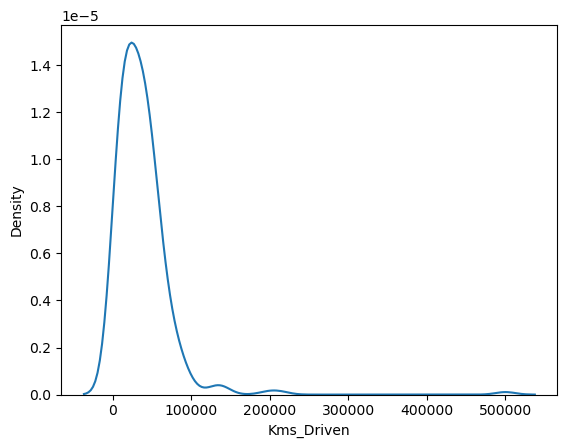

7.590604807858934


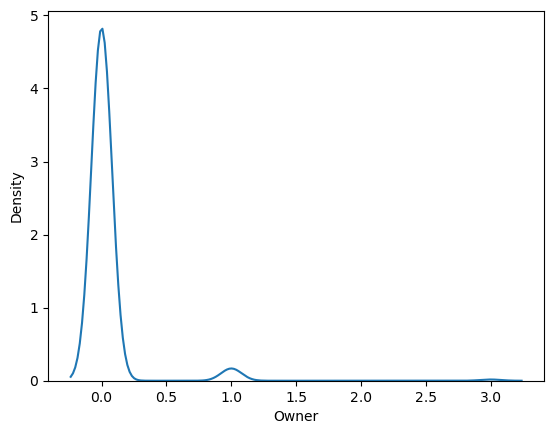

In [12]:
for col in num_col:
    print(num_col[col].skew())
    sns.kdeplot(df[col])
    plt.show()

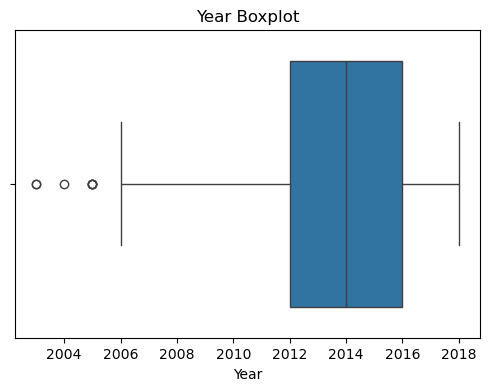

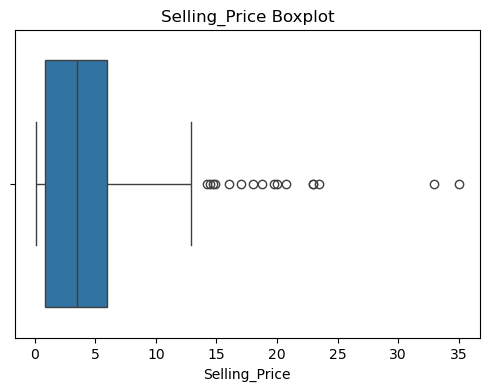

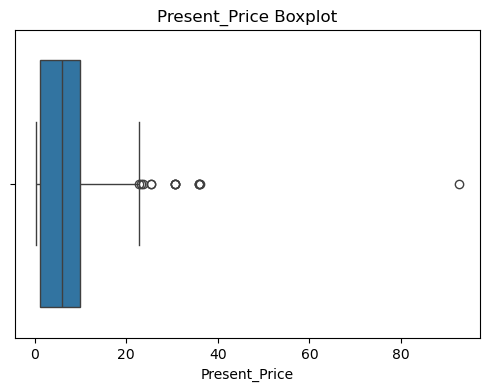

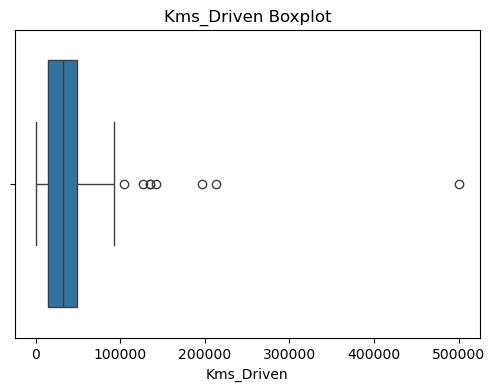

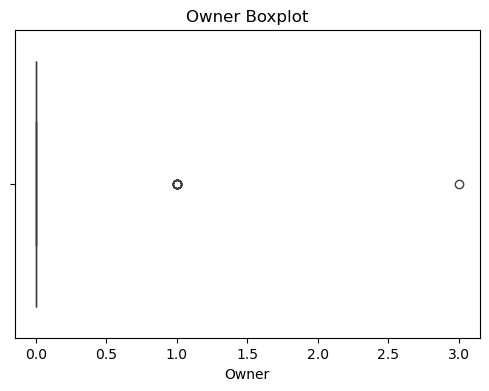

In [13]:
for col in num_col:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"{col} Boxplot")
    plt.show()

In [14]:
numerical_cols_to_clean_outliers = ['Year', 'Owner','Kms_Driven', 'Selling_Price', 'Present_Price']

for col in numerical_cols_to_clean_outliers:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)].copy()

print("Shape of the DataFrame after removing outliers from 'Year' and 'Owner':", df.shape)
display(df.head())

Shape of the DataFrame after removing outliers from 'Year' and 'Owner': (261, 9)


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [15]:
numerical_cols_to_transform = ['Kms_Driven', 'Selling_Price', 'Present_Price']

pt = PowerTransformer(method='yeo-johnson')
transformed_data = pt.fit_transform(df[numerical_cols_to_transform])
df[numerical_cols_to_transform] = transformed_data
display(df.head())

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,0.116985,0.174675,-0.046445,Petrol,Dealer,Manual,0
1,sx4,2013,0.530408,0.837260,0.651327,Diesel,Dealer,Manual,0
2,ciaz,2017,1.096765,0.880831,-1.313970,Petrol,Dealer,Manual,0
3,wagon r,2011,-0.057562,-0.142538,-1.478026,Petrol,Dealer,Manual,0
4,swift,2014,0.490355,0.415785,0.629549,Diesel,Dealer,Manual,0


In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in ['Fuel_Type', 'Seller_Type', 'Transmission']:
  df[col]=le.fit_transform(df[col])

In [17]:
df.drop(['Car_Name'], axis=1, inplace=True)

In [18]:
X = df.drop('Selling_Price', axis=1) 
y = df['Selling_Price']     
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)  
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = GradientBoostingRegressor()

In [19]:
param_grid={
  'learning_rate': [0.01, 0.05, 0.1],
  'n_estimators': [50, 100, 200],
  'max_depth': [2,3,4]
}
cv=KFold(n_splits=5, shuffle=True, random_state=42)
grid_search=GridSearchCV(estimator=model,
                         param_grid=param_grid,
                         cv=cv,
                         scoring='r2',
                         n_jobs=-1,
                         verbose=2)
grid_search.fit(X_train,y_train)
print(grid_search.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [20]:

model = GradientBoostingRegressor()
model.fit(X_train, y_train)

# 2️⃣ Predict
y_pred = model.predict(X_test)
print("R^2 Score on Training set:", model.score(X_train, y_train))
print("R^2 Score on Test set:", model.score(X_test, y_test))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)

R^2 Score on Training set: 0.9951237194959047
R^2 Score on Test set: 0.9843822373509477
RMSE: 0.12195737515332657
MAE: 0.09433179347356349


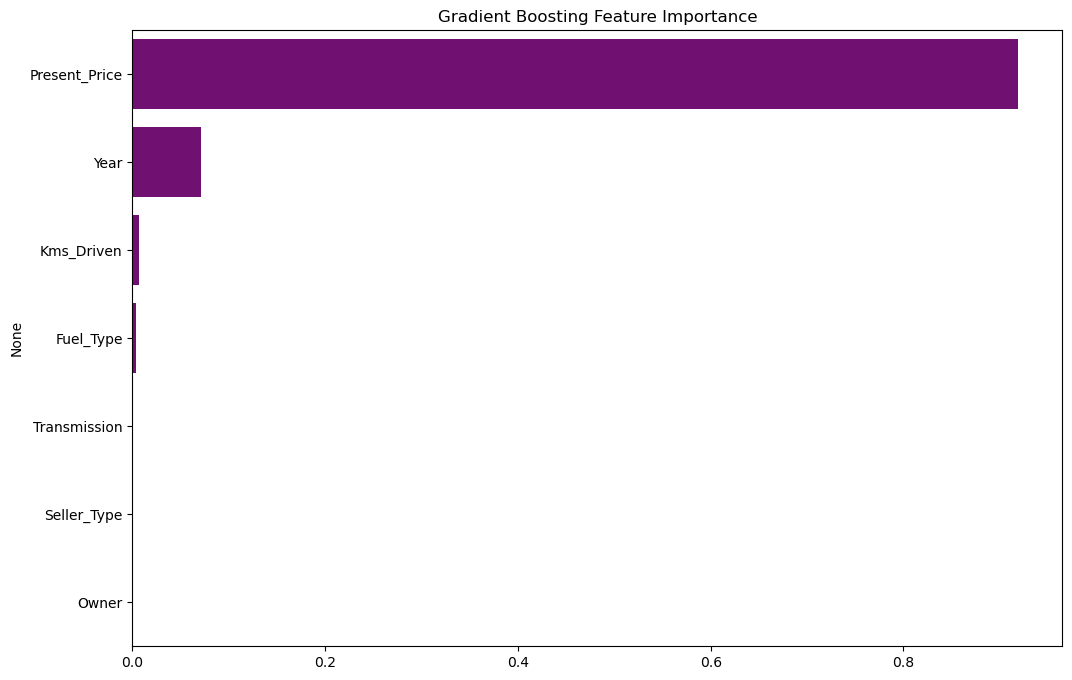

In [21]:
feature_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=feature_imp.values, y=feature_imp.index,color='purple')
plt.title("Gradient Boosting Feature Importance")
plt.show()

In [22]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Define XGB
xgb = XGBRegressor( eval_metric='logloss', random_state=42)

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}

# Grid search
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1
)

# ✅ Fit the grid search, not the base model
grid_search.fit(X_train, y_train)

# Now you can access best_estimator_
best_model = grid_search.best_estimator_

# Predict with best model
y_pred = best_model.predict(X_test)

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)


R2 Score: 0.9843943706603121


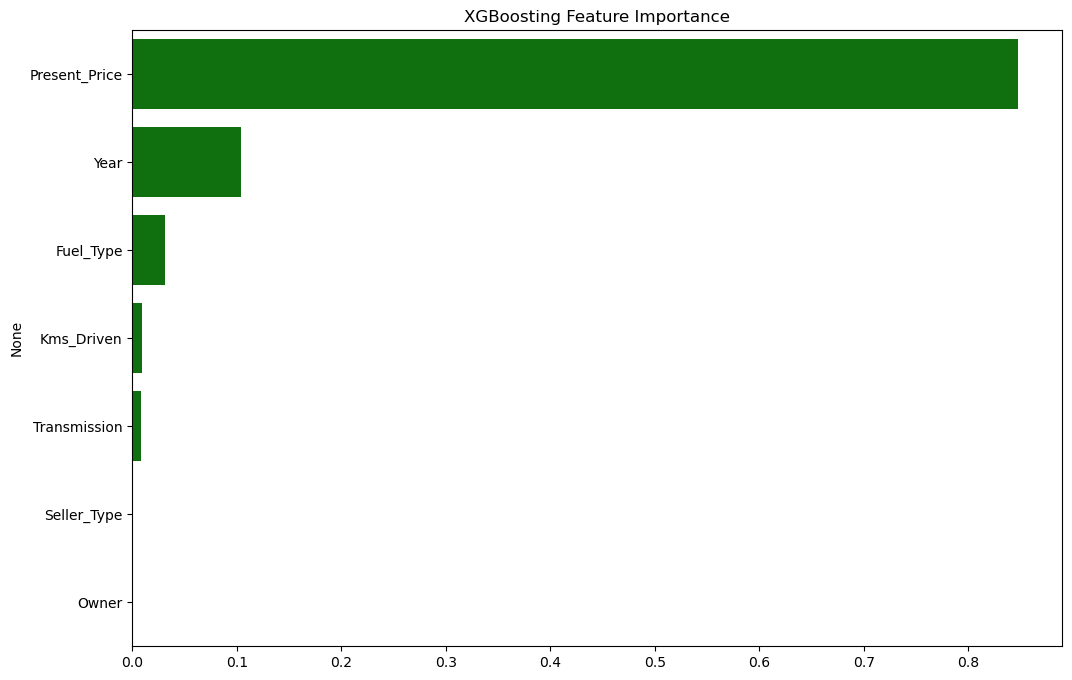

In [23]:
feature_imp = pd.Series(best_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=feature_imp.values, y=feature_imp.index,color='green')
plt.title("XGBoosting Feature Importance")
plt.show()

In [24]:

from sklearn.ensemble import AdaBoostRegressor

ab = AdaBoostRegressor(n_estimators=500, random_state=42)
ab.fit(X_train, y_train)  # now y_train can be continuous
y_pred = ab.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)

R2 Score: 0.970814356040947
RMSE: 0.16671831009661953
MAE: 0.1289942961134979


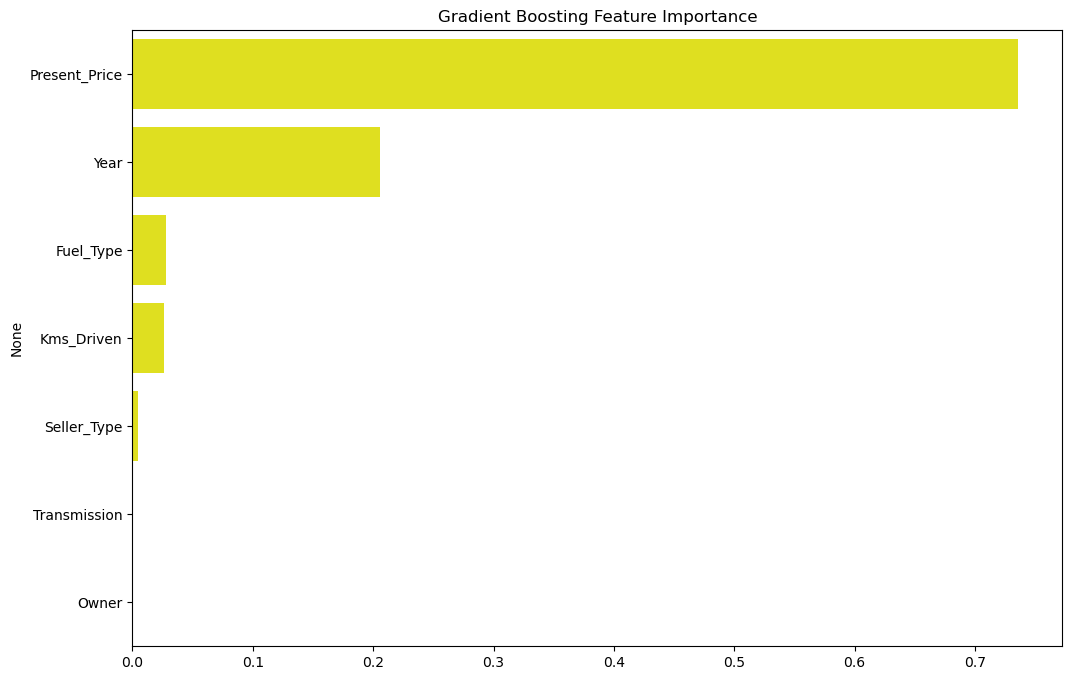

In [ ]:
feature_imp = pd.Series(ab.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=feature_imp.values, y=feature_imp.index,color='yellow')
plt.title("ADA Boosting Feature Importance")
plt.show()

In [26]:
from sklearn.ensemble import RandomForestRegressor
ran=RandomForestRegressor(random_state=42, n_estimators=200)
ran.fit(X_train, y_train)
y_pred = ran.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)


R2 Score: 0.9801238903679956
RMSE: 0.13758286574296053
MAE: 0.10128681139561199


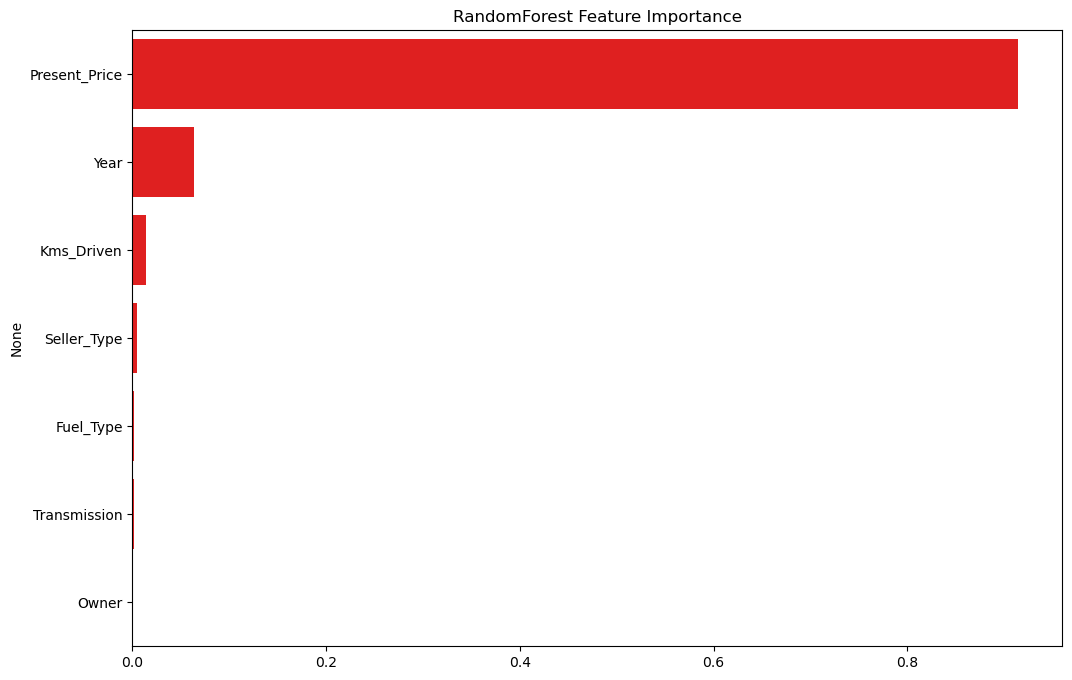

In [28]:
feature_imp = pd.Series(ran.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_imp.values, y=feature_imp.index,color='red')
plt.title("RandomForest Feature Importance")
plt.show()

# comparatively gradient boosting predicts the selling price with the high accuracy
